In [1]:
%display typeset

## Modelo SEIR 


$$\frac{dS}{dT}=-\lambda \cdot S(t) \cdot I(t)$$

$$\frac{dE}{dT}=\lambda \cdot S(t) \cdot I(t) - \alpha \cdot E(t) $$

$$\frac{dI}{dT}=\alpha \cdot E(t) - \gamma \cdot I(t)$$

$$\frac {dR}{dT}=\gamma \cdot I(t)$$

In [2]:
def ODE (t,y,params):
    S,E,I,R = y
    lam,alfa,gama = params
    return [-lam*S*I,
            lam*S*I - alfa*E,
            alfa*E - gama*I,
            gama*I ]

In [44]:
T = ode_solver()
T.algorithm = "rk8pd"
T.function = ODE

y_0 = 500,5,5,5
t_span=[0,250]
num_points=200
params=[0.03,0.5,0.3]

T.ode_solve( t_span , y_0 , num_points , params )

In [50]:
#T.solution[0:2]

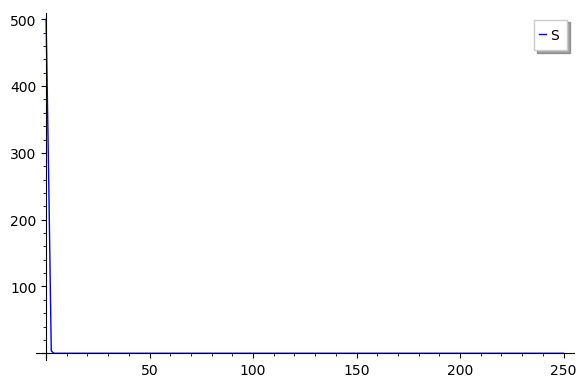

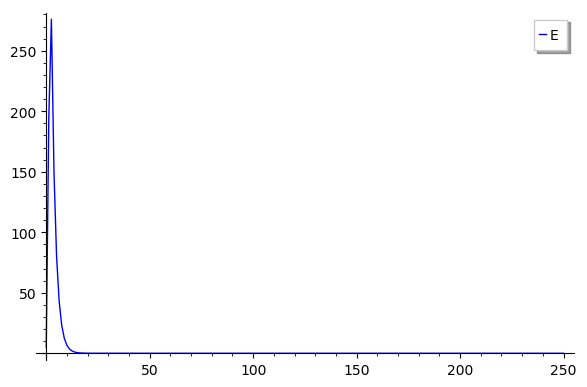

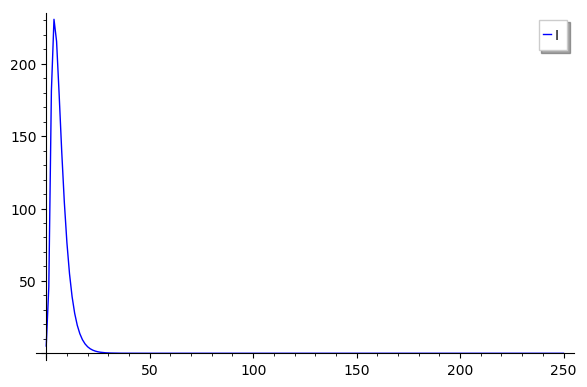

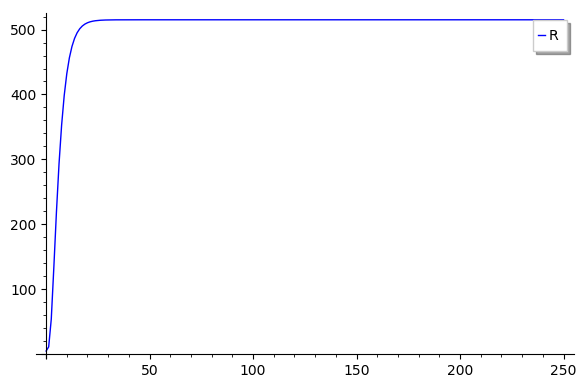

In [46]:
S = T.plot_solution(0,interpolate=True, legend_label='S')
E = T.plot_solution(1,interpolate=True, legend_label='E')
I = T.plot_solution(2,interpolate=True, legend_label='I')
R = T.plot_solution(3,interpolate=True, legend_label='R')

In [5]:
import pandas as pd

data = pd.read_csv("owid-covid-data.csv")
data = data[data.iso_code=="FRA"]
data.reset_index(inplace=True)

In [75]:
data

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,13421,FRA,Europe,France,2019-12-31,0.0,0.0,NaN,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
1,13422,FRA,Europe,France,2020-01-01,0.0,0.0,NaN,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
2,13423,FRA,Europe,France,2020-01-02,0.0,0.0,NaN,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
3,13424,FRA,Europe,France,2020-01-03,0.0,0.0,NaN,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
4,13425,FRA,Europe,France,2020-01-04,0.0,0.0,NaN,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,13666,FRA,Europe,France,2020-09-01,281025.0,3082.0,5167.286,30635.0,29.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
246,13667,FRA,Europe,France,2020-09-02,286007.0,4982.0,5407.000,30661.0,26.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
247,13668,FRA,Europe,France,2020-09-03,293024.0,7017.0,5633.857,30686.0,25.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
248,13669,FRA,Europe,France,2020-09-04,300181.0,7157.0,5783.286,30686.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66


In [31]:
C = list_plot(data['total_cases'],legend_label='cases')
NC = list_plot(data['new_cases'],legend_label='new cases')
D = list_plot(data['total_deaths'],legend_label='deaths')
ND = list_plot(data['new_deaths'],legend_label='new deaths')

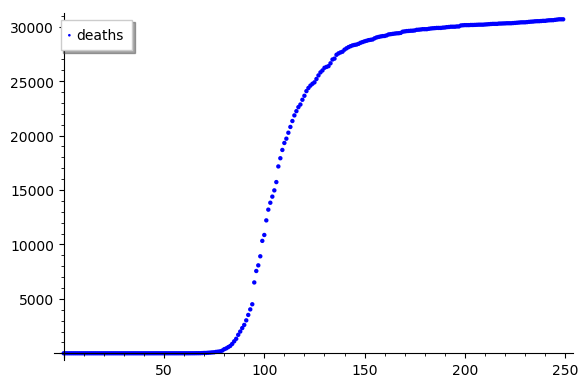

In [49]:
g = Graphics()
g += D
#g += R
g.show()